<a href="https://colab.research.google.com/github/Bhavyagautam08/IDA-MINI-PROJECT/blob/main/IDA_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/IDA_PROJECT.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.head())

   id  age  gender         country diagnosis_date cancer_stage  \
0   1   64  Female         Germany     07-04-2016    Stage III   
1   2   50    Male  Czech Republic     22-04-2023    Stage III   
2   3   65    Male         Romania     07-04-2023     Stage IV   
3   4   51  Female          Latvia     07-02-2016    Stage III   
4   5   37    Male          Greece     01-12-2023      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  21-04-2016             No    Never Smoked  31.1   
1                  02-05-2023            Yes  Passive Smoker  25.9   
2                  12-04-2023             No    Never Smoked  18.9   
3                  13-02-2016            Yes   Former Smoker  34.6   
4                  03-12-2023            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1      

In [ ]:
#printing last five rows
df.tail()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
1048570,1048571,37,Female,Slovakia,20-02-2022,Stage II,27-02-2022,No,Passive Smoker,16.4,154,0,0,0,0,Radiation,05-12-2022,0
1048571,1048572,53,Female,Bulgaria,24-12-2020,Stage II,30-12-2020,Yes,Never Smoked,28.2,188,0,1,0,0,Radiation,21-08-2022,1
1048572,1048573,58,Male,Slovakia,28-10-2019,Stage IV,29-10-2019,No,Former Smoker,18.1,195,1,0,1,1,Combined,15-12-2020,0
1048573,1048574,55,Male,Slovakia,01-03-2023,Stage III,14-03-2023,No,Former Smoker,39.0,288,0,1,0,0,Combined,22-09-2023,0
1048574,1048575,61,Female,Denmark,06-05-2020,Stage I,01-06-2020,Yes,Current Smoker,36.3,267,1,1,1,0,Radiation,23-02-2022,0


In [ ]:
#shape of the data
df.shape

(1048575, 18)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   id                           1048575 non-null  int64  
 1   age                          1048575 non-null  int64  
 2   gender                       1048575 non-null  object 
 3   country                      1048575 non-null  object 
 4   diagnosis_date               1048575 non-null  object 
 5   cancer_stage                 1048575 non-null  object 
 6   beginning_of_treatment_date  1048575 non-null  object 
 7   family_history               1048575 non-null  object 
 8   smoking_status               1048575 non-null  object 
 9   bmi                          1048575 non-null  float64
 10  cholesterol_level            1048575 non-null  int64  
 11  hypertension                 1048575 non-null  int64  
 12  asthma                       1048575 non-n

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
beginning_of_treatment_date,0
family_history,0
smoking_status,0
bmi,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#identifying gabage values
for i in df.select_dtypes(include=['object']).columns:
  print(df[i].value_counts())

gender
Female    524997
Male      523578
Name: count, dtype: int64
country
Czech Republic    39187
Poland            39166
Denmark           39056
Hungary           39020
Cyprus            38972
Malta             38971
Lithuania         38964
Italy             38964
Croatia           38900
Netherlands       38899
Bulgaria          38897
Ireland           38889
Spain             38878
Germany           38875
Romania           38871
Slovakia          38852
Latvia            38784
Sweden            38769
Greece            38715
Luxembourg        38715
France            38692
Estonia           38690
Portugal          38676
Belgium           38641
Slovenia          38565
Finland           38507
Austria           38460
Name: count, dtype: int64
diagnosis_date
17-05-2024    358
28-05-2022    355
18-05-2022    346
20-03-2020    341
10-03-2017    339
             ... 
05-07-2020    237
13-05-2017    236
05-02-2015    233
18-10-2015    232
05-02-2017    225
Name: count, Length: 3651, dtype: int6

In [ ]:
#descriptive statistics
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,5.500616e+01,3.048358e+01,2.336130e+02,7.498491e-01,4.683976e-01,2.263310e-01,8.798512e-02,2.194712e-01
std,3.026977e+05,9.994689e+00,8.369675e+00,4.344054e+01,4.331000e-01,4.990005e-01,4.184560e-01,2.832734e-01,4.138886e-01
min,1.000000e+00,4.000000e+00,1.600000e+01,1.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621445e+05,4.800000e+01,2.320000e+01,1.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.242880e+05,5.500000e+01,3.050000e+01,2.420000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.864315e+05,6.200000e+01,3.770000e+01,2.710000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.048575e+06,1.040000e+02,4.500000e+01,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.describe(include='object')

,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,treatment_type,end_treatment_date
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,2,27,3651,4,3680,2,4,4,4194
top,Female,Czech Republic,17-05-2024,Stage II,20-12-2022,Yes,Passive Smoker,Chemotherapy,11-01-2024
freq,524997,39187,358,262357,343,524501,262566,262628,349


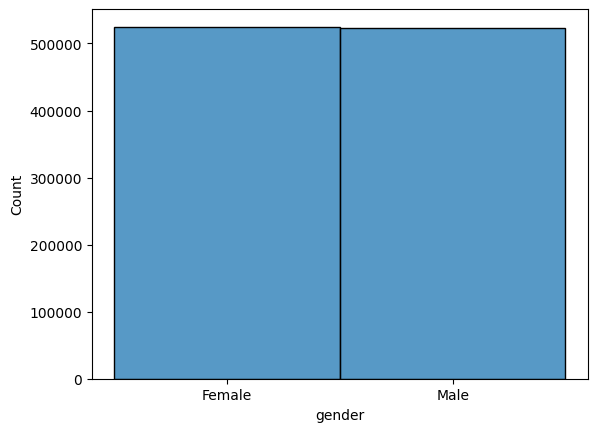

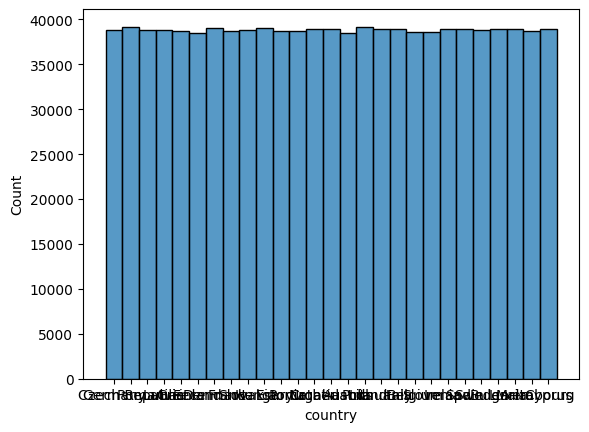

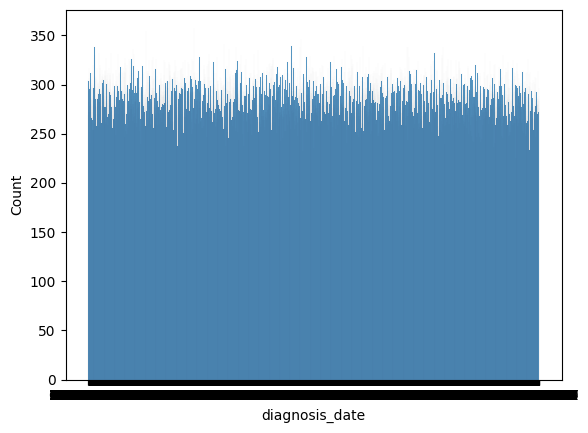

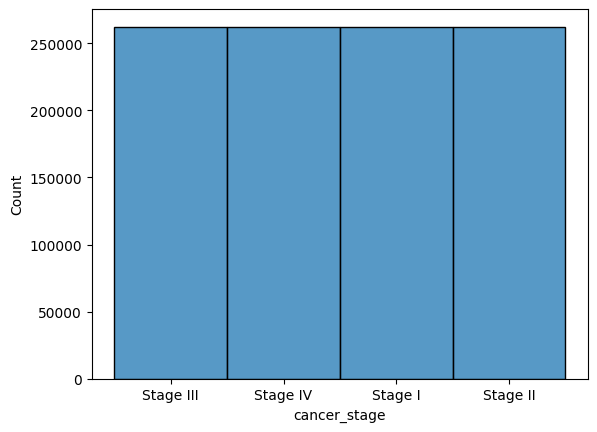

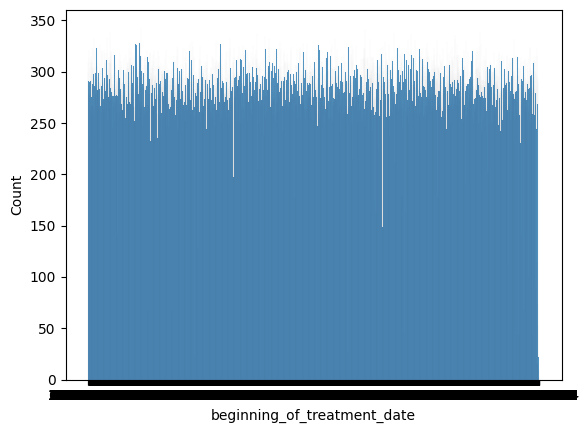

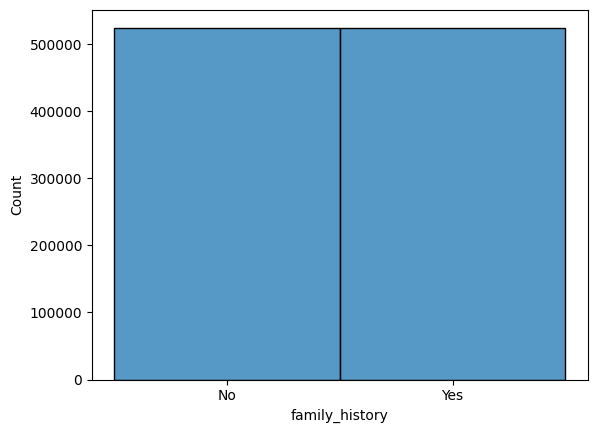

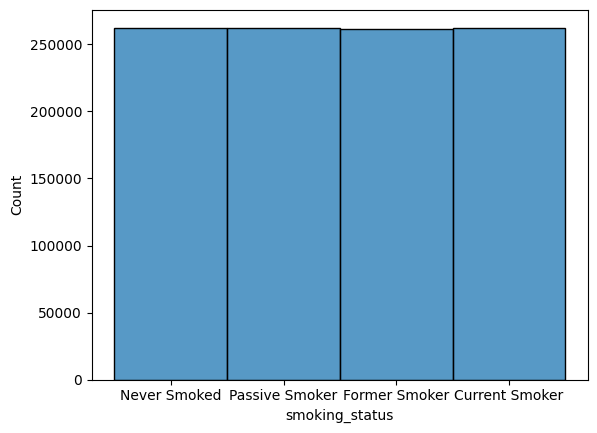

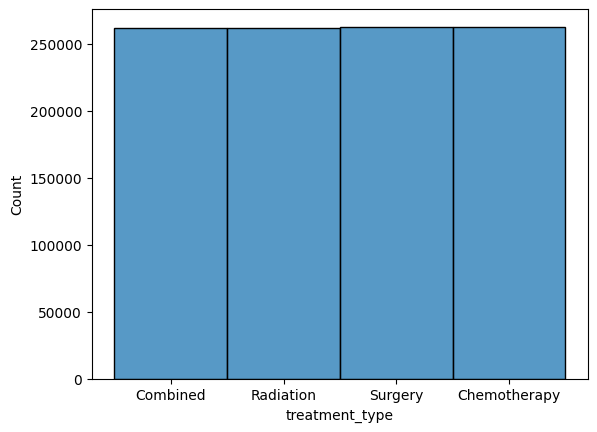

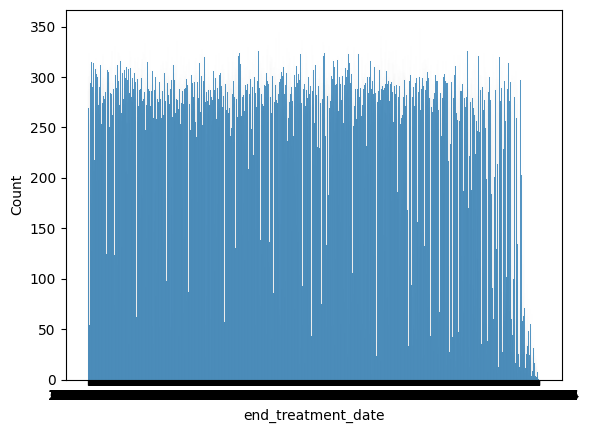

In [ ]:
#histogram to understand the distribution
for i in df.select_dtypes(include=['object']).columns:
  sns.histplot(df[i])
  plt.show()


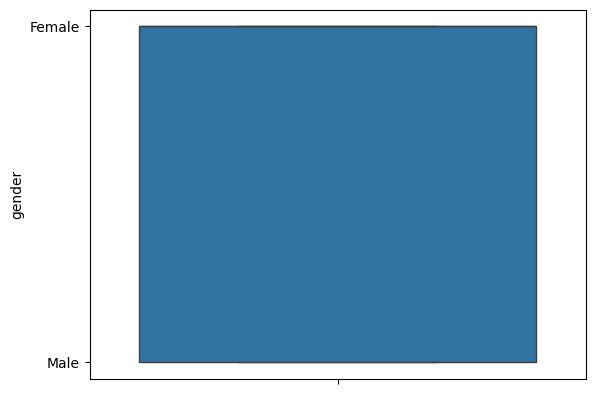

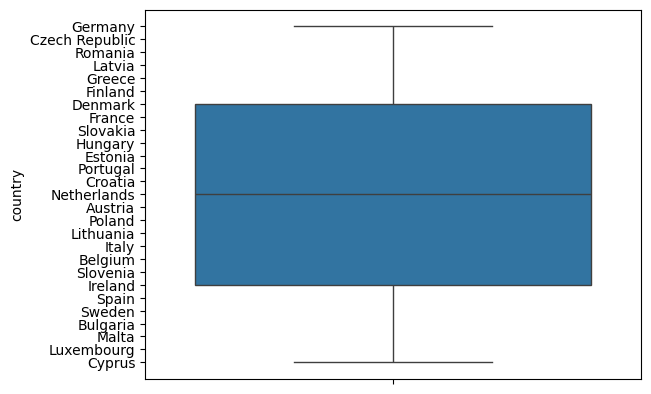

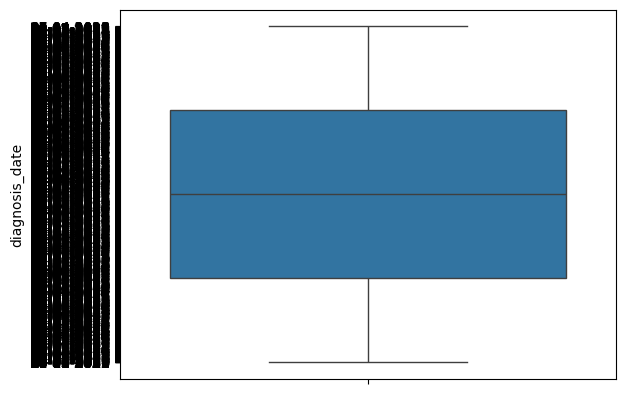

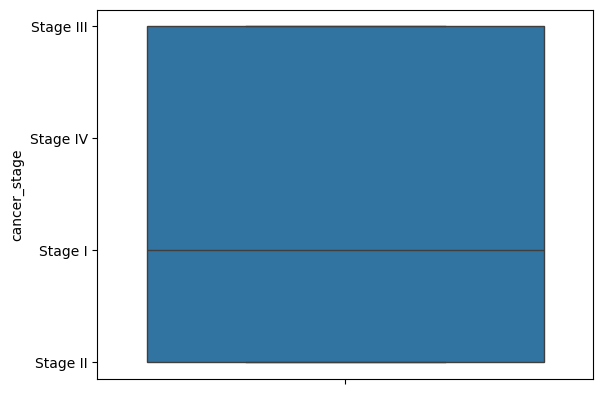

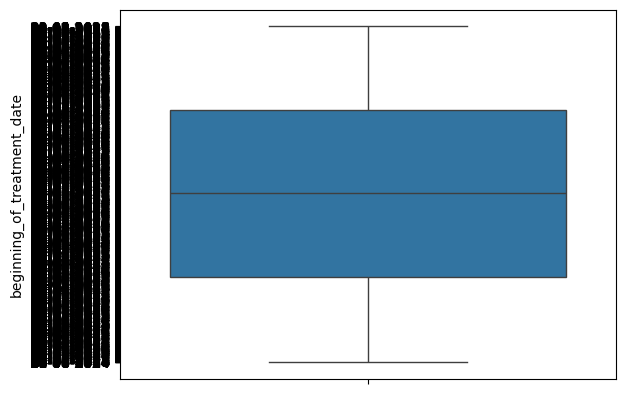

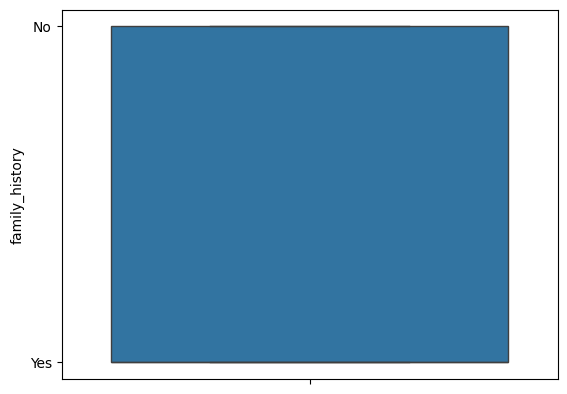

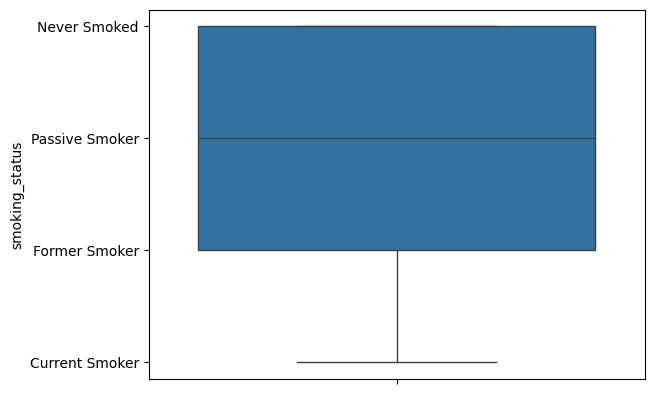

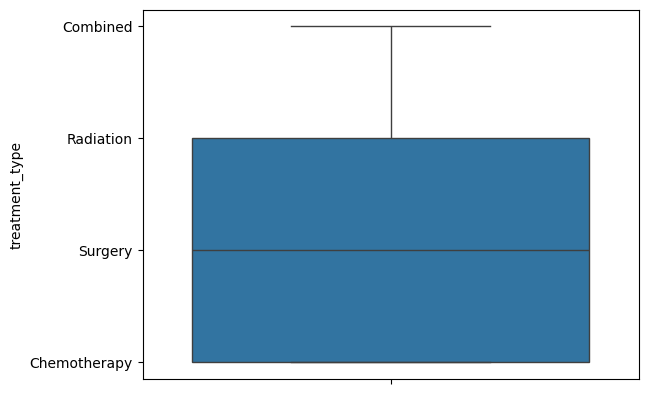

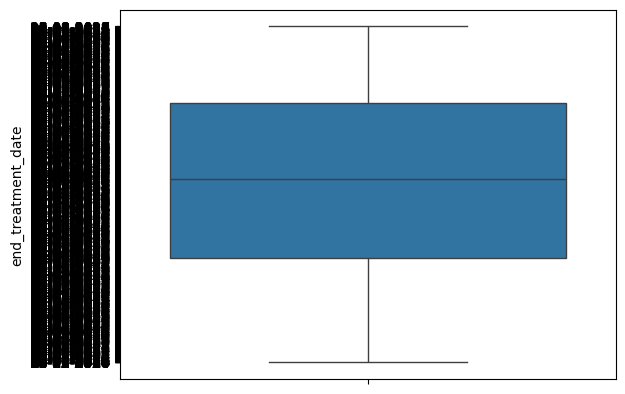

In [ ]:
#boxplot to identify outliers
for i in df.select_dtypes(include=['object']).columns:
  sns.boxplot(df[i])
  plt.show()

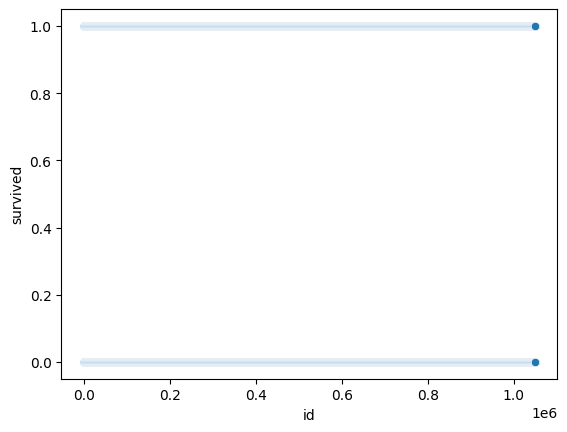

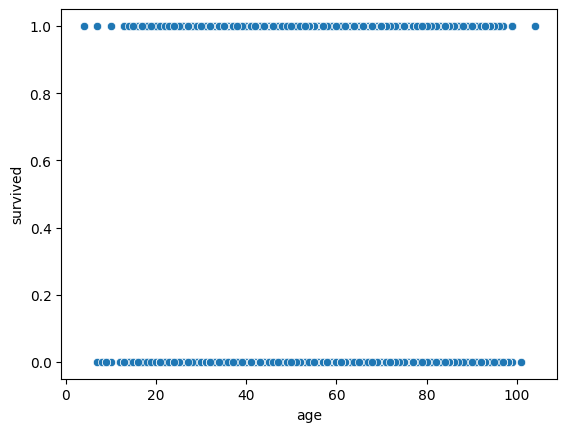

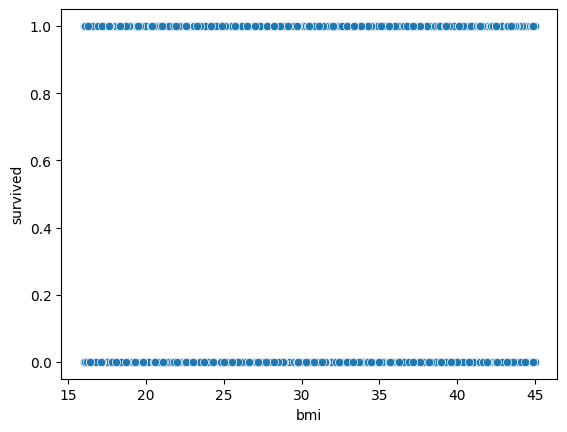

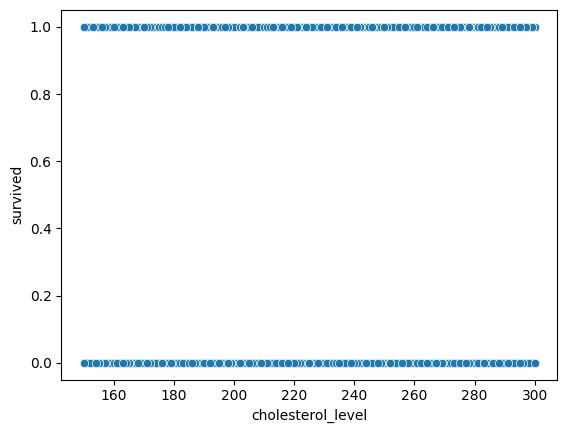

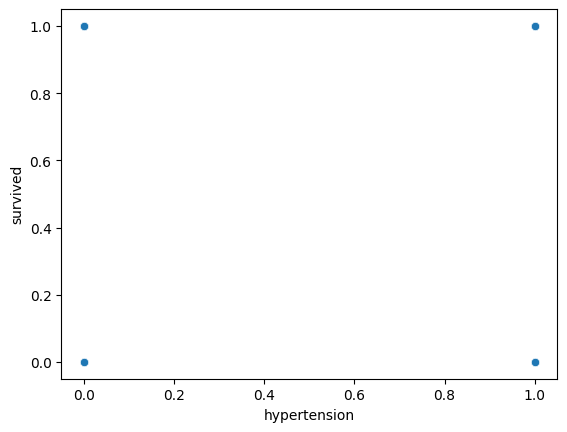

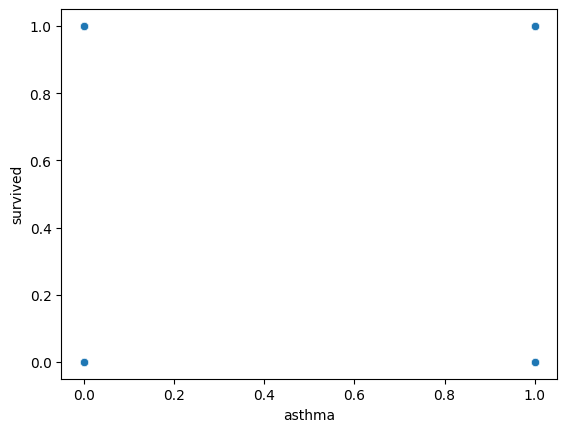

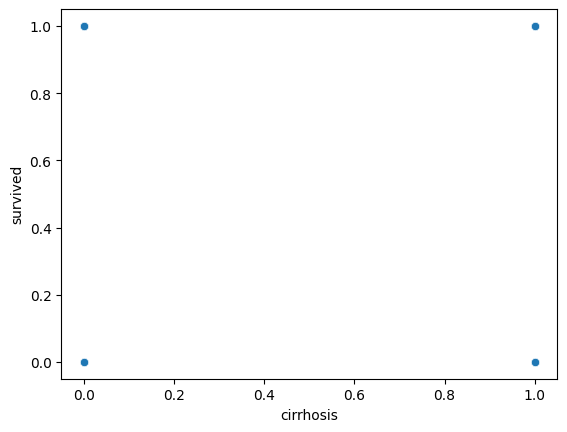

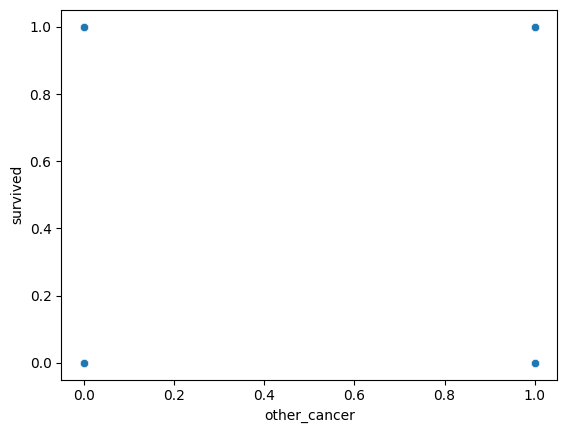

In [ ]:
#scatterplot to understand the relationship
for i in ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer'] :
       sns.scatterplot(data=df, x=i, y='survived')
       plt.show()

In [ ]:
df.select_dtypes(include=['number']).columns

Index(['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'survived'],
      dtype='object')

In [ ]:
#Corelations with heatmap to interpretthe relation and multicollinaarity
s=df.select_dtypes(include=['number']).corr()
print(s)

                         id       age       bmi  cholesterol_level  \
id                 1.000000 -0.000042 -0.000249          -0.000226   
age               -0.000042  1.000000 -0.001503          -0.001858   
bmi               -0.000249 -0.001503  1.000000           0.746992   
cholesterol_level -0.000226 -0.001858  0.746992           1.000000   
hypertension      -0.001235 -0.000740  0.000744           0.000933   
asthma            -0.002724 -0.001224  0.001034           0.000567   
cirrhosis         -0.000441 -0.002409 -0.002443          -0.002000   
other_cancer       0.001353  0.000432 -0.000398           0.001007   
survived          -0.000016  0.000738  0.000425           0.000311   

                   hypertension    asthma  cirrhosis  other_cancer  survived  
id                    -0.001235 -0.002724  -0.000441      0.001353 -0.000016  
age                   -0.000740 -0.001224  -0.002409      0.000432  0.000738  
bmi                    0.000744  0.001034  -0.002443     -0.00

<Axes: >

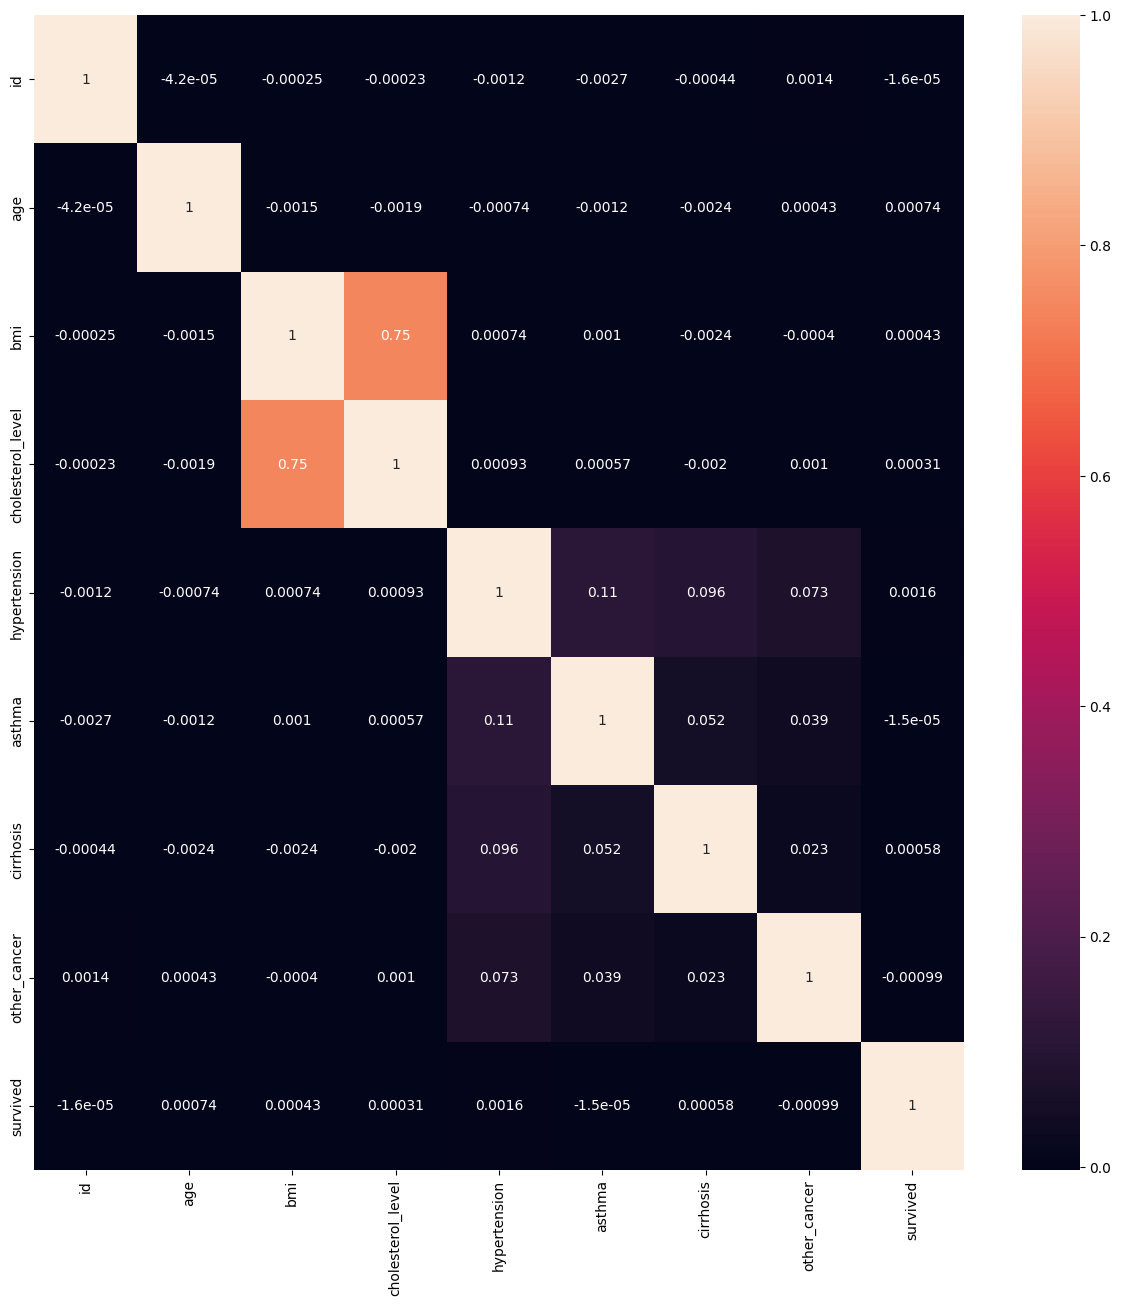

In [ ]:
plt.figure(figsize= (15,15))
sns.heatmap(s,annot=True)


In [ ]:
#treatment for missing values
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
beginning_of_treatment_date,0
family_history,0
smoking_status,0
bmi,0


In [ ]:
#there is no null value but we will write a code for survived column
a=df['survived'].mean()
df.fillna(a,inplace=True)
print(df.head())

   id  age  gender         country diagnosis_date cancer_stage  \
0   1   64  Female         Germany     07-04-2016    Stage III   
1   2   50    Male  Czech Republic     22-04-2023    Stage III   
2   3   65    Male         Romania     07-04-2023     Stage IV   
3   4   51  Female          Latvia     07-02-2016    Stage III   
4   5   37    Male          Greece     01-12-2023      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  21-04-2016             No    Never Smoked  31.1   
1                  02-05-2023            Yes  Passive Smoker  25.9   
2                  12-04-2023             No    Never Smoked  18.9   
3                  13-02-2016            Yes   Former Smoker  34.6   
4                  03-12-2023            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1      

In [ ]:
#K nearest neighbour
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [ ]:
for i in df.select_dtypes(include=['number']).columns:
  df[i]=impute.fit_transform(df[[i]])

In [ ]:
#outliers treatment, Defining function wisker
def wisker(col) :
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  return upper,lower


In [ ]:
wisker(df['bmi'])

(59.45000000000001, 1.4499999999999922)

In [ ]:
#defining whisker and outliers seperation
for i in ['bmi','age','cholesterol_level']:
  upper,lower=wisker(df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])
  df[i]=np.where(df[i]<lower,lower,df[i])

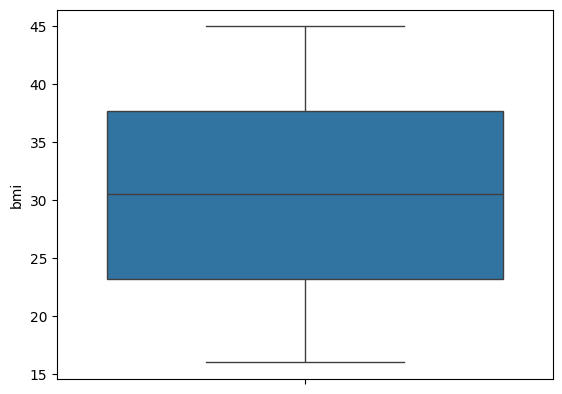

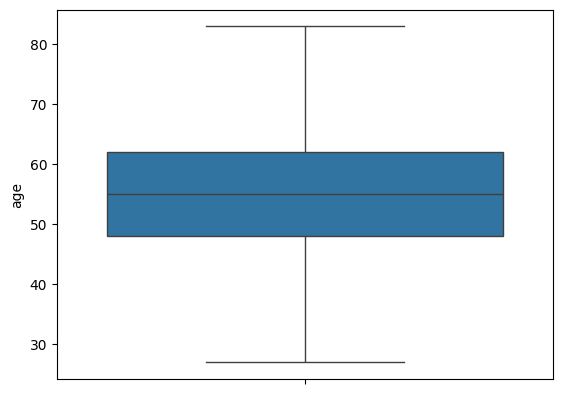

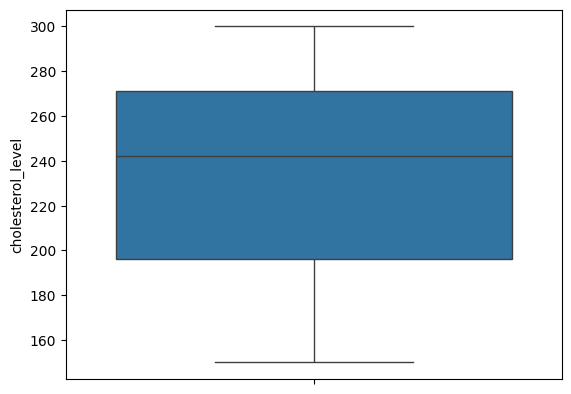

In [ ]:
for i in ['bmi','age','cholesterol_level']:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
#duplicates and garbage value treatment
df.drop_duplicates()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1.0,64.0,Female,Germany,07-04-2016,Stage III,21-04-2016,No,Never Smoked,31.1,257.0,1.0,1.0,0.0,0.0,Combined,15-11-2017,0.0
1,2.0,50.0,Male,Czech Republic,22-04-2023,Stage III,02-05-2023,Yes,Passive Smoker,25.9,208.0,1.0,0.0,0.0,0.0,Radiation,25-04-2024,0.0
2,3.0,65.0,Male,Romania,07-04-2023,Stage IV,12-04-2023,No,Never Smoked,18.9,193.0,0.0,0.0,0.0,0.0,Surgery,11-03-2025,0.0
3,4.0,51.0,Female,Latvia,07-02-2016,Stage III,13-02-2016,Yes,Former Smoker,34.6,249.0,1.0,1.0,1.0,0.0,Surgery,14-04-2017,1.0
4,5.0,37.0,Male,Greece,01-12-2023,Stage I,03-12-2023,Yes,Never Smoked,40.2,262.0,0.0,0.0,0.0,0.0,Chemotherapy,20-09-2024,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048571.0,37.0,Female,Slovakia,20-02-2022,Stage II,27-02-2022,No,Passive Smoker,16.4,154.0,0.0,0.0,0.0,0.0,Radiation,05-12-2022,0.0
1048571,1048572.0,53.0,Female,Bulgaria,24-12-2020,Stage II,30-12-2020,Yes,Never Smoked,28.2,188.0,0.0,1.0,0.0,0.0,Radiation,21-08-2022,1.0
1048572,1048573.0,58.0,Male,Slovakia,28-10-2019,Stage IV,29-10-2019,No,Former Smoker,18.1,195.0,1.0,0.0,1.0,1.0,Combined,15-12-2020,0.0
1048573,1048574.0,55.0,Male,Slovakia,01-03-2023,Stage III,14-03-2023,No,Former Smoker,39.0,288.0,0.0,1.0,0.0,0.0,Combined,22-09-2023,0.0


In [ ]:
#do label encoding and one hot encoding using pd.getdummies
dummy = pd.get_dummies(data=df,columns=['gender', 'smoking_status'], drop_first=True)
print(dummy.head())


    id   age         country diagnosis_date cancer_stage  \
0  1.0  64.0         Germany     07-04-2016    Stage III   
1  2.0  50.0  Czech Republic     22-04-2023    Stage III   
2  3.0  65.0         Romania     07-04-2023     Stage IV   
3  4.0  51.0          Latvia     07-02-2016    Stage III   
4  5.0  37.0          Greece     01-12-2023      Stage I   

  beginning_of_treatment_date family_history   bmi  cholesterol_level  \
0                  21-04-2016             No  31.1              257.0   
1                  02-05-2023            Yes  25.9              208.0   
2                  12-04-2023             No  18.9              193.0   
3                  13-02-2016            Yes  34.6              249.0   
4                  03-12-2023            Yes  40.2              262.0   

   hypertension  asthma  cirrhosis  other_cancer treatment_type  \
0           1.0     1.0        0.0           0.0       Combined   
1           1.0     0.0        0.0           0.0      Radiation   